# 🧠 Programación II - Semana 2
**Tema: Transformación de datos con NumPy y clasificación con KNN**
Basado en el libro *Numerical Python* de Robert Johansson

## 🔢 Transformaciones de Arrays con NumPy

In [1]:
import numpy as np

# Array 3D ejemplo
array3d = np.arange(24).reshape(2, 3, 4)
print("Array original:")
print(array3d)

# Estadísticas por ejes
print("\nMedia por eje 0:", np.mean(array3d, axis=0))
print("\nMedia por eje 1:", np.mean(array3d, axis=1))
print("\nMedia por eje 2:", np.mean(array3d, axis=2))

Array original:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

Media por eje 0: [[ 6.  7.  8.  9.]
 [10. 11. 12. 13.]
 [14. 15. 16. 17.]]

Media por eje 1: [[ 4.  5.  6.  7.]
 [16. 17. 18. 19.]]

Media por eje 2: [[ 1.5  5.5  9.5]
 [13.5 17.5 21.5]]


## ✅ Operaciones con axis

In [2]:
# Ejemplo de operaciones estadísticas en matrices
# Matriz de ejemplo
ventas = np.array([
    [200, 220, 250],
    [180, 210, 240],
    [170, 200, 230]
])

# Media por columnas (promedio por mes)
media_columnas = np.mean(ventas, axis=0)
print("Media por columnas:", media_columnas)

# Desviación estándar por filas (variabilidad por producto)
desviacion_filas = np.std(ventas, axis=1)
print("Desviación por filas:", desviacion_filas)

# Mínimo por eje
min_filas = np.min(ventas, axis=1)
print("Mínimos por fila:", min_filas)

# Máximo por eje
max_columnas = np.max(ventas, axis=0)
print("Máximos por columna:", max_columnas)

# Varianza por eje
varianza_columnas = np.var(ventas, axis=0)
print("Varianza por columnas:", varianza_columnas)


Media por columnas: [183.33333333 210.         240.        ]
Desviación por filas: [20.54804668 24.49489743 24.49489743]
Mínimos por fila: [200 180 170]
Máximos por columna: [200 220 250]
Varianza por columnas: [155.55555556  66.66666667  66.66666667]


## 🔎 Uso de argmin() y argmax()

In [3]:
# Índices del valor máximo por fila
idx_max_filas = np.argmax(ventas, axis=1)
print("Índice de máximo por fila:", idx_max_filas)

# Índices del valor mínimo por columna
idx_min_columnas = np.argmin(ventas, axis=0)
print("Índice de mínimo por columna:", idx_min_columnas)


Índice de máximo por fila: [2 2 2]
Índice de mínimo por columna: [2 2 2]


## 🔄 Transformaciones de forma

In [4]:
# Array original
arr = np.arange(12).reshape(3, 4)

# Flatten: convierte a 1D
flattened = arr.flatten()
print("Flatten:", flattened)

# Ravel: igual a flatten pero más eficiente
raveled = arr.ravel()
print("Ravel:", raveled)

# Reshape: de (3, 4) a (2, 6)
reshaped = arr.reshape(2, 6)
print("Reshape:", reshaped)


Flatten: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Ravel: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Reshape: [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


## 🔄 Concatenación y Apilamiento

In [5]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# Concatenar verticalmente
concat_v = np.concatenate([a, b], axis=0)
print("Concatenación vertical:\n", concat_v)

# Concatenar horizontalmente
concat_h = np.concatenate([a, b], axis=1)
print("Concatenación horizontal:\n", concat_h)

# Stack: crea un nuevo eje
stacked = np.stack([a, b], axis=0)
print("Stack eje 0:\n", stacked)

# vstack y hstack
vstacked = np.vstack([a, b])
hstacked = np.hstack([a, b])
print("vstack:\n", vstacked)
print("hstack:\n", hstacked)


Concatenación vertical:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concatenación horizontal:
 [[1 2 5 6]
 [3 4 7 8]]
Stack eje 0:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
vstack:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
hstack:
 [[1 2 5 6]
 [3 4 7 8]]


## 🔁 Inversión con np.flip()

In [6]:
# Invertir filas
flip_filas = np.flip(a, axis=0)
print("Filas invertidas:\n", flip_filas)

# Invertir columnas
flip_columnas = np.flip(a, axis=1)
print("Columnas invertidas:\n", flip_columnas)


Filas invertidas:
 [[3 4]
 [1 2]]
Columnas invertidas:
 [[2 1]
 [4 3]]


# 🔍 Clasificación con KNN (Dataset Iris)

# 🧠 Algoritmo KNN desde cero con NumPy – Guía Teórica + Matemática

## 1. Cargar el dataset
Importar el archivo `Iris.csv` y extraer las características numéricas $X \in \mathbb{R}^{n \times d}$ y las etiquetas categóricas $y \in \{0, 1, ..., C-1\}$, donde:
- $n$: número de ejemplos,
- $d$: número de características,
- $C$: número de clases.



In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('Iris.csv')  # Ajusta la ruta si es necesario
print("Primeras 5 filas:")
print(data.head())

# Extraer características y etiquetas
X = data.iloc[:, 1:5].values  # Asumiendo que las características están en columnas 1-4
y = data['Species'].values    # 

Primeras 5 filas:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## 2. Preprocesamiento
Transformar las etiquetas categóricas a valores numéricos utilizando codificación ordinal. El resultado será un vector $y \in \mathbb{N}^n$.



In [4]:
# Convertir etiquetas categóricas a numéricas
especies_unicas = np.unique(y)
y_numerico = np.zeros(len(y), dtype=int)

for i, especie in enumerate(especies_unicas):
    y_numerico[y == especie] = i

print("Etiquetas originales:", especies_unicas)
print("Etiquetas convertidas:", np.unique(y_numerico))

# Podríamos normalizar las características, pero lo omitiremos por ahora

Etiquetas originales: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Etiquetas convertidas: [0 1 2]


## 3. División del dataset
Separar el dataset en entrenamiento y prueba:
- $X_{\text{train}}, y_{\text{train}}$
- $X_{\text{test}}, y_{\text{test}}$




In [5]:
# Dividir el dataset en conjuntos de entrenamiento y prueba (70% - 30%)
np.random.seed(42)  # Para reproducibilidad
indices = np.random.permutation(len(X))
n_train = int(0.7 * len(X))

# Obtener los índices de entrenamiento y prueba
train_idx = indices[:n_train]
test_idx = indices[n_train:]

# Dividir los datos
X_train = X[train_idx]
y_train = y_numerico[train_idx]
X_test = X[test_idx]
y_test = y_numerico[test_idx]

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de prueba: 45


## 4. Cálculo de distancias

Para cada ejemplo de prueba $\mathbf{x} \in X_{\text{test}}$, calcular su distancia a cada punto de entrenamiento $\mathbf{x}_i \in X_{\text{train}}$ mediante la **distancia euclidiana**:

$$
d(\mathbf{x}, \mathbf{x}_i) = \sqrt{\sum_{j=1}^d (x_j - x_{i,j})^2}
$$



## 5. Selección de los $k$ vecinos más cercanos

Ordenar todas las distancias y tomar los índices de los $k$ menores valores:

$$
\text{vecinos}(\mathbf{x}) = \text{argsort}(d(\mathbf{x}, \mathbf{x}_i))[:k]
$$



## 6. Votación mayoritaria

Para la predicción de $\hat{y}$, usar la clase más frecuente entre los vecinos:

$$
\hat{y} = \arg\max_{c \in \{0, \dots, C-1\}} \sum_{i \in \text{vecinos}(\mathbf{x})} \mathbf{1}[y_i = c]
$$

Donde $\mathbf{1}[\cdot]$ es la función indicadora.



## 7. Evaluación del modelo

Comparar $\hat{y}$ con $y_{\text{test}}$ y calcular la **exactitud (accuracy)** como:

$$
\text{Accuracy} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \mathbf{1}[\hat{y}_i = y_i]
$$

Exactitud del modelo KNN con k=3: 0.9778

Matriz de Confusión:
[[10  0  0]
 [ 0 17  0]
 [ 0  1 17]]


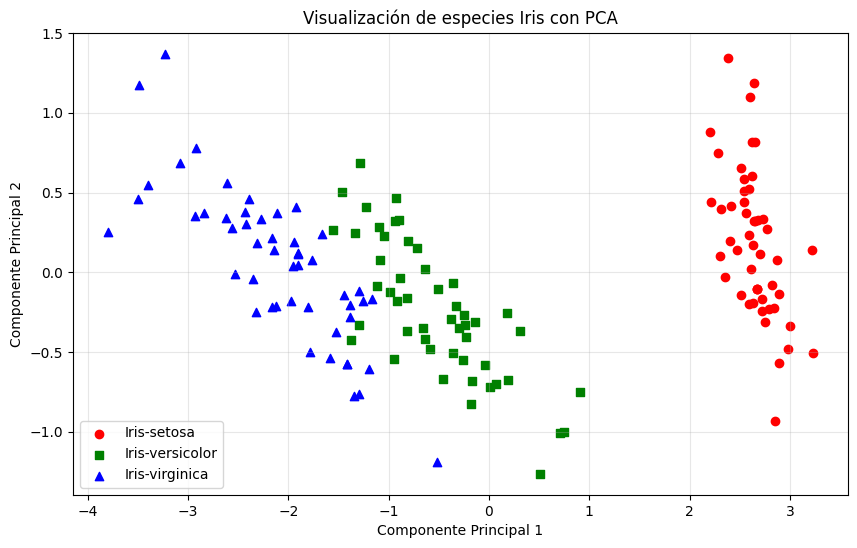

In [6]:
def calcular_distancias(x, X_train):
    """Calcula las distancias euclidianas entre un punto x y todos los puntos en X_train."""
    return np.sqrt(np.sum((X_train - x)**2, axis=1))

def knn_predict(X_train, y_train, x_test, k=5):
    """Predice la clase de x_test usando los k vecinos más cercanos."""
    # Calcular distancias
    distancias = calcular_distancias(x_test, X_train)

    # Obtener los índices de los k vecinos más cercanos
    k_vecinos_indices = np.argsort(distancias)[:k]

    # Obtener las clases de los k vecinos más cercanos
    k_vecinos_clases = y_train[k_vecinos_indices]

    # Determinar la clase más frecuente (votación mayoritaria)
    clases, conteos = np.unique(k_vecinos_clases, return_counts=True)
    return clases[np.argmax(conteos)]
def predecir_conjunto(X_train, y_train, X_test, k=5):
    """Predice las clases para todo el conjunto X_test."""
    y_pred = np.zeros(len(X_test), dtype=int)

    for i, x_test in enumerate(X_test):
        y_pred[i] = knn_predict(X_train, y_train, x_test, k)

    return y_pred

# Predecir clases para el conjunto de prueba
k = 3  # Número de vecinos a considerar
y_pred = predecir_conjunto(X_train, y_train, X_test, k)

# Calcular la exactitud (accuracy)
accuracy = np.mean(y_pred == y_test)
print(f"Exactitud del modelo KNN con k={k}: {accuracy:.4f}")

# Mostrar matriz de confusión
def matriz_confusion(y_true, y_pred, n_clases):
    """Calcula la matriz de confusión."""
    conf_matrix = np.zeros((n_clases, n_clases), dtype=int)
    for i in range(len(y_true)):
        conf_matrix[y_true[i]][y_pred[i]] += 1
    return conf_matrix

n_clases = len(especies_unicas)
conf_matrix = matriz_confusion(y_test, y_pred, n_clases)
print("\nMatriz de Confusión:")
print(conf_matrix)
# Implementación simple de PCA para visualización
def simple_pca(X, n_components=2):
    """Implementa PCA básico con NumPy."""
    # Centrar datos
    X_centered = X - np.mean(X, axis=0)

    # Calcular matriz de covarianza
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Obtener valores y vectores propios
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Ordenar de mayor a menor
    idx = np.argsort(eigen_values)[::-1]
    eigen_vectors = eigen_vectors[:, idx]

    # Seleccionar los primeros n_components vectores
    components = eigen_vectors[:, :n_components]

    # Proyectar datos
    X_pca = np.dot(X_centered, components)

    return X_pca

# Reducir dimensionalidad para visualización
X_pca = simple_pca(X, n_components=2)

# Graficar resultados
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i, especie in enumerate(especies_unicas):
    plt.scatter(X_pca[y_numerico == i, 0], X_pca[y_numerico == i, 1],
               c=colors[i], marker=markers[i], label=especie)

plt.title('Visualización de especies Iris con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 🧪 Retos adicionales para estudiantes (no resolver en clase)
- Cambia el valor de `k` y analiza los resultados.
- Usa `np.argmax` y `np.argmin` en arrays aleatorios.
- Normaliza el dataset Iris manualmente con `np.mean` y `np.std` usando `axis=0`.

Exactitud con k=1: 0.9778
Exactitud con k=3: 0.9778
Exactitud con k=5: 0.9778
Exactitud con k=7: 0.9778
Exactitud con k=9: 0.9778


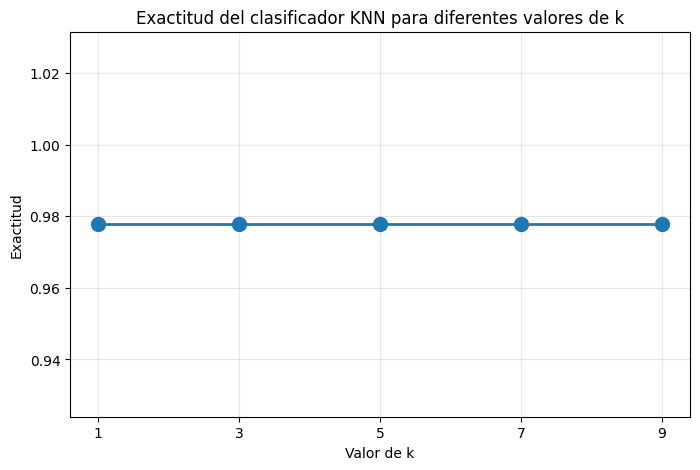

Array aleatorio:
[[51 92 14 71 60]
 [20 82 86 74 74]
 [87 99 23  2 21]
 [52  1 87 29 37]]

Índice del máximo por fila: [1 2 1 2]
Índice del máximo por columna: [2 2 3 1 1]

Índice del mínimo por fila: [2 0 3 1]
Índice del mínimo por columna: [1 3 0 2 2]


In [7]:
# 1. Cambiar el valor de k y analizar los resultados
resultados = {}
for k_valor in [1, 3, 5, 7, 9]:
    y_pred = predecir_conjunto(X_train, y_train, X_test, k=k_valor)
    acc = np.mean(y_pred == y_test)
    resultados[k_valor] = acc
    print(f"Exactitud con k={k_valor}: {acc:.4f}")

# Visualizar los resultados
plt.figure(figsize=(8, 5))
ks = list(resultados.keys())
accs = list(resultados.values())
plt.plot(ks, accs, 'o-', linewidth=2, markersize=10)
plt.xlabel('Valor de k')
plt.ylabel('Exactitud')
plt.title('Exactitud del clasificador KNN para diferentes valores de k')
plt.xticks(ks)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Usar np.argmax y np.argmin en arrays aleatorios
np.random.seed(42)
array_aleatorio = np.random.randint(0, 100, (4, 5))
print("Array aleatorio:")
print(array_aleatorio)

# Índice del valor máximo por fila y columna
idx_max_fila = np.argmax(array_aleatorio, axis=1)
idx_max_col = np.argmax(array_aleatorio, axis=0)
print("\nÍndice del máximo por fila:", idx_max_fila)
print("Índice del máximo por columna:", idx_max_col)

# Índice del valor mínimo por fila y columna
idx_min_fila = np.argmin(array_aleatorio, axis=1)
idx_min_col = np.argmin(array_aleatorio, axis=0)
print("\nÍndice del mínimo por fila:", idx_min_fila)
print("Índice del mínimo por columna:", idx_min_col)

# 3. Normalizar el dataset Iris manualmente
def normalizar_datos(X):
    """Normaliza los datos usando la técnica z-score: (x - media) / desviación estándar"""

# Ejercicio en Diapositivas



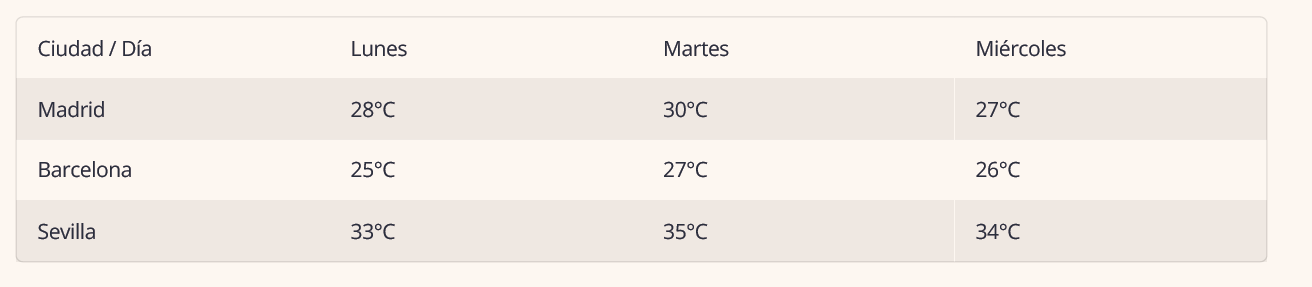

In [3]:
import numpy as np

In [8]:
temperaturas=[[28,30,27],[25,27,26],[33,35,34]]


temperaturas_np=np.array(temperaturas)
print(temperaturas_np)

[[28 30 27]
 [25 27 26]
 [33 35 34]]


In [10]:
max_temp_c=np.max(temperaturas_np,axis=1)
print(max_temp_c)

[30 27 35]


In [11]:
max_temp_d=np.min(temperaturas_np,axis=0)
print(max_temp_d)

[25 27 26]


### Normalizar, convertir los valores entre 0 y 1


In [13]:
max_array=np.max(temperaturas_np)
max_array

np.int64(35)

In [14]:
min_array=np.min(temperaturas_np)
min_array

np.int64(25)

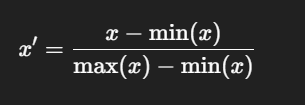

In [21]:
rank=max_array-min_array
rank

np.int64(10)

In [22]:
array_norm_p=temperaturas_np-min_array
print(array_norm_p)

[[ 3  5  2]
 [ 0  2  1]
 [ 8 10  9]]


In [25]:
array_norm=array_norm_p/rank

print(array_norm)

[[0.3 0.5 0.2]
 [0.  0.2 0.1]
 [0.8 1.  0.9]]
